# Import the necessary libraries

In [473]:
import numpy as np # linear algebra
import pandas as pd # loading and processing the data (e.g. pd.read_csv)
from google.colab import drive

# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Import models from tensorflow module:
from sklearn.model_selection import train_test_split
!pip install tensorflow tensorflow_decision_forests
import tensorflow as tf
import tensorflow_decision_forests as tfdf

#For Model validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

# Loading the Dataset

In [474]:
# Mounting the drive where the dataset is saved.
drive.mount('/content/drive')

# Loading the dataset
Dataset=pd.read_csv("/content/drive/MyDrive/R&D (Dataset)/data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [475]:
Dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [476]:
Dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [477]:
print('Data type of the column "id" :',Dataset['id'].dtype)
print('Data type of the column "Unnamed: 32" :',Dataset['Unnamed: 32'].dtype)

Data type of the column "id" : int64
Data type of the column "Unnamed: 32" : float64


In [478]:
unique_ids = Dataset['id'].unique()
unique_ids_series = pd.Series(unique_ids)
print('Some values of the column "id" ',unique_ids_series.head())

print()
print('----'*20)
print()

unique_Unnamed= Dataset['Unnamed: 32'].unique()
unique_Unnamed_series = pd.Series(unique_Unnamed)
print('Some values of the column "Unnamed" ',unique_Unnamed_series.head())

Some values of the column "id"  0      842302
1      842517
2    84300903
3    84348301
4    84358402
dtype: int64

--------------------------------------------------------------------------------

Some values of the column "Unnamed"  0   NaN
dtype: float64


**Conclusion :** It can see that the columns 'id' and 'Unnamed: 32' is not required or it can said that they are not contributing to the classification problem, So these columns in the pre-processing step.

In [479]:
# checking for null enteries and Datatype of all the columns
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Conclusion :** It is seen that there are no null values in the dataset, also the target column namely 'diagnosis' has the dtype as object, so it needs to be changed to binary values. This also need to be done during the pre-processing step.

In [480]:
Dataset.shape

(569, 33)

In [481]:
# checking for the number of Bengin and Malignant values in the whole datatset
print ("Total number of diagnosis are ", str(Dataset.shape[0]), "where", Dataset.diagnosis.value_counts()['B'], "are Benign and ",Dataset.diagnosis.value_counts()['M'],"are Malignant.")

Total number of diagnosis are  569 where 357 are Benign and  212 are Malignant.


**Conclusion :** There are 569 rows, among which 357 are Benign (Non-cancerous) and 212 Malignant (cancerous)

In [482]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

<ipython-input-483-541a22de2c07>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['radius_mean'], bins=bins, color='green', label='M')
<ipython-input-483-541a22de2c07>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['radi

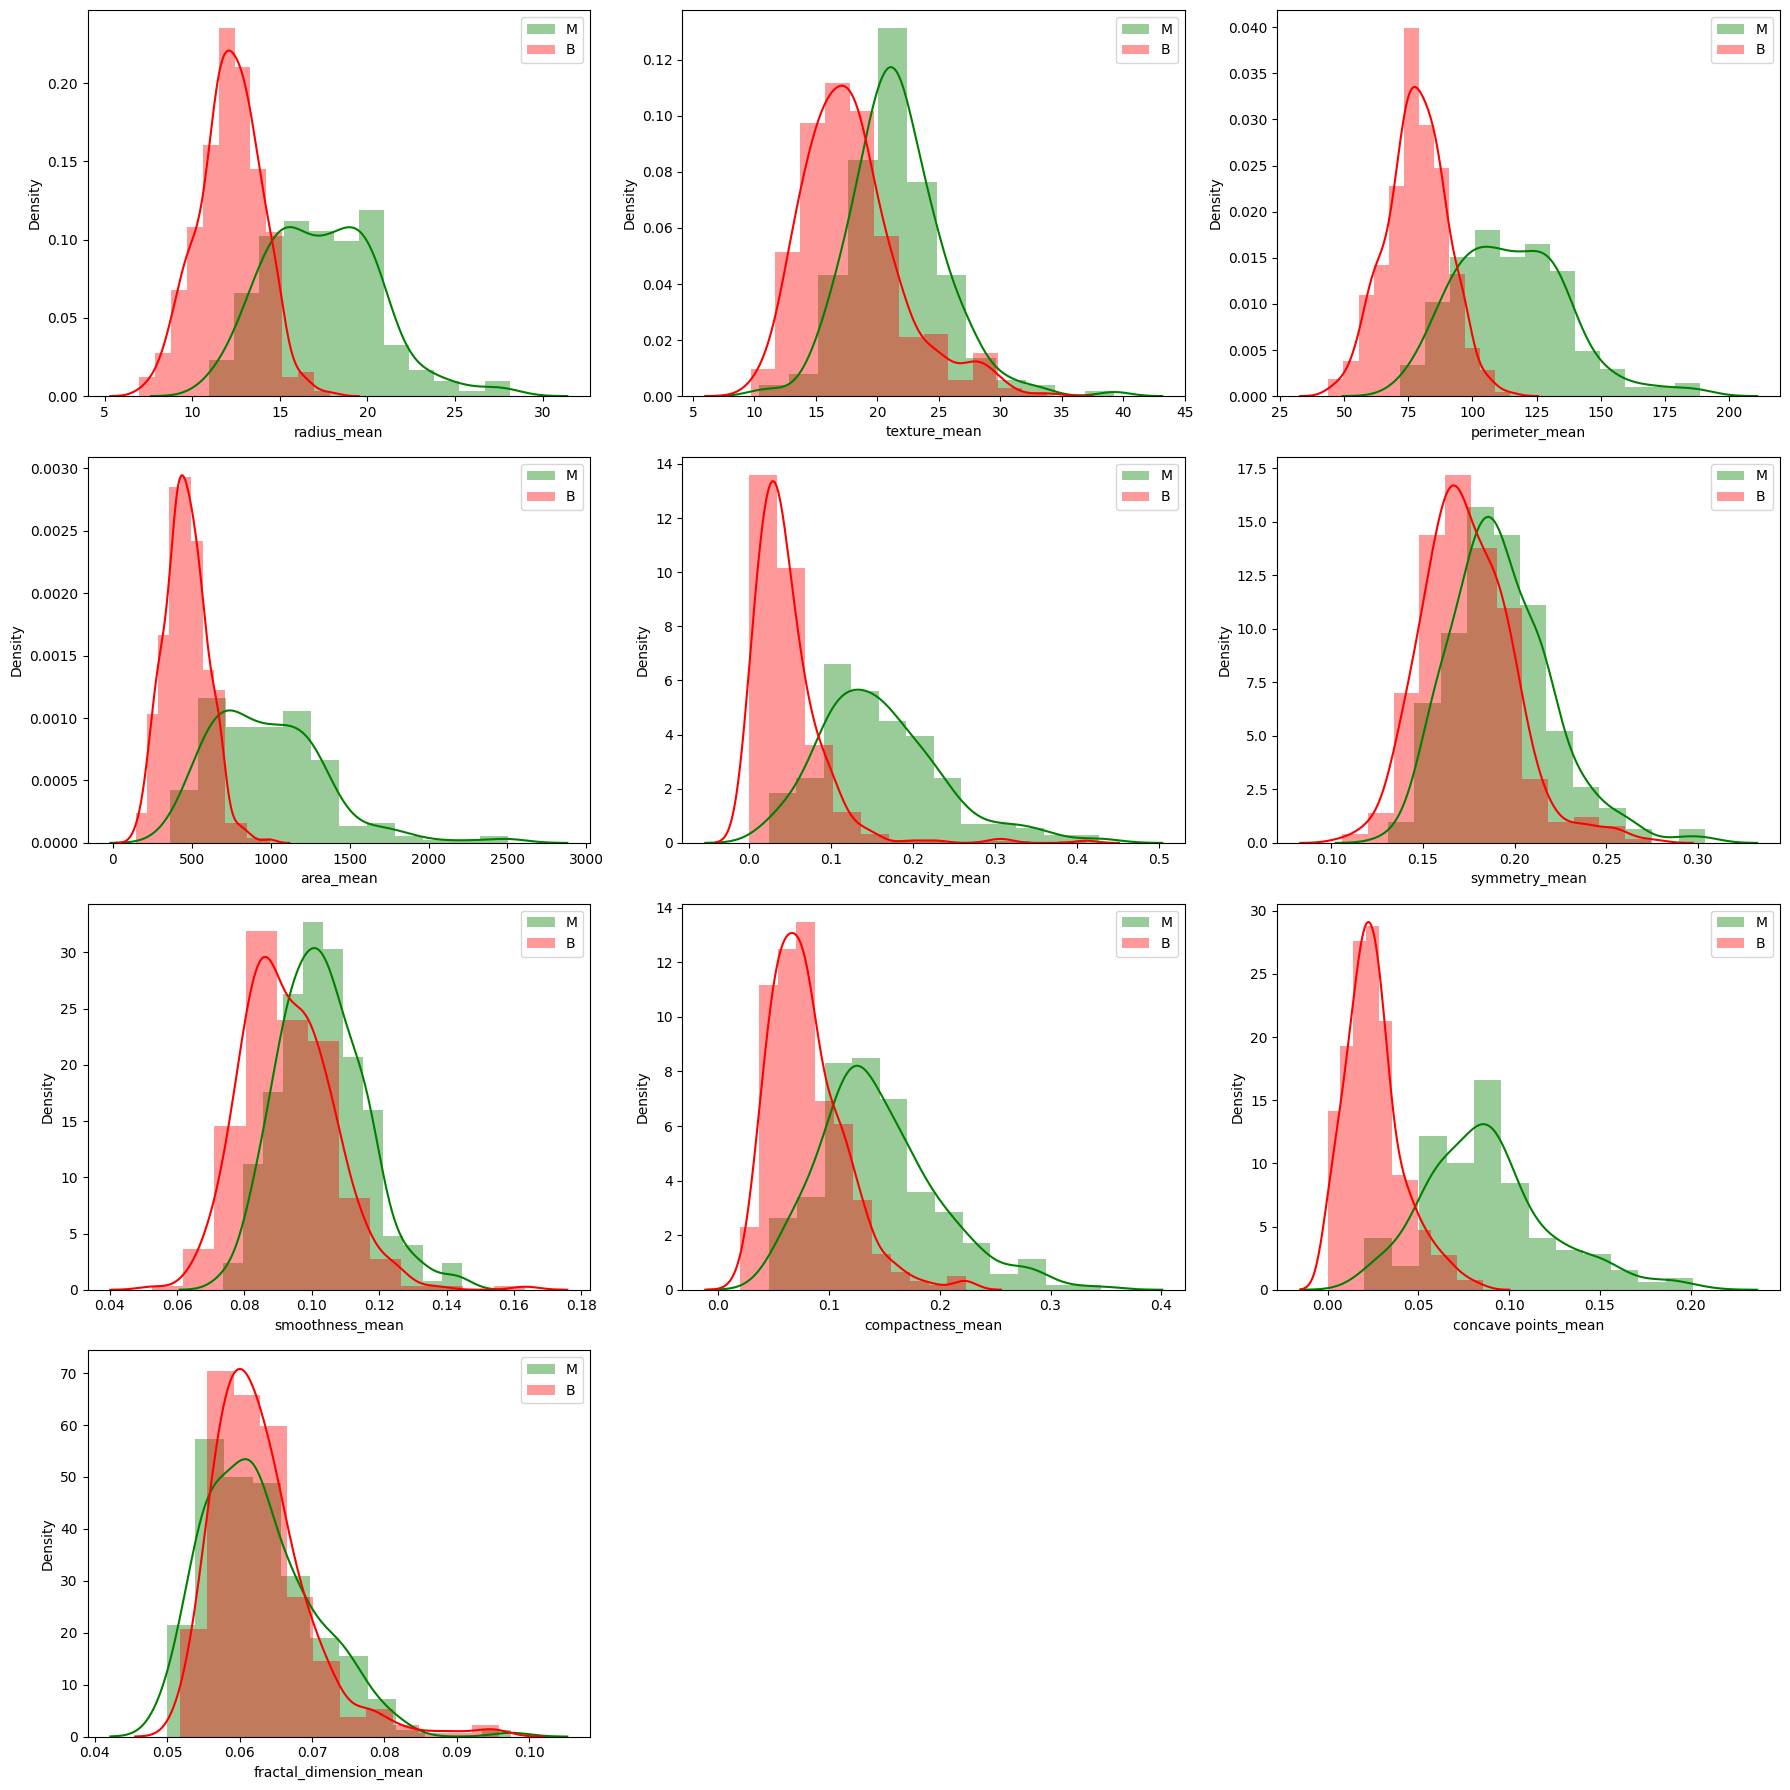

In [483]:
# features Vs diagonostic

bins = 12
plt.figure(figsize=(18, 18))
plt.subplot(4, 3, 1)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 2)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 3)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 4)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 5)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 6)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 7)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['smoothness_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['smoothness_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 8)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['compactness_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['compactness_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 9)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['concave points_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['concave points_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(4, 3, 10)
sns.distplot(Dataset[Dataset['diagnosis'] == 'M']['fractal_dimension_mean'], bins=bins, color='green', label='M')
sns.distplot(Dataset[Dataset['diagnosis'] == 'B']['fractal_dimension_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()




**Conclusion :**
1. Cancer categorization can employ mean values of cell radius, perimeter, area, compactness, concavity, and concave spots. Higher values of these indicators are associated with malignant tumors.
2. Mean texture, smoothness, symmetry, or fractual dimension values do not indicate a preference for one diagnosis over another. There are no obvious significant outliers in any of the histograms that require further cleaning.

<ipython-input-484-6a8a0cb72e66>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Dataset[featureMeans].corr(), annot=True, square=True, cmap='plasma')


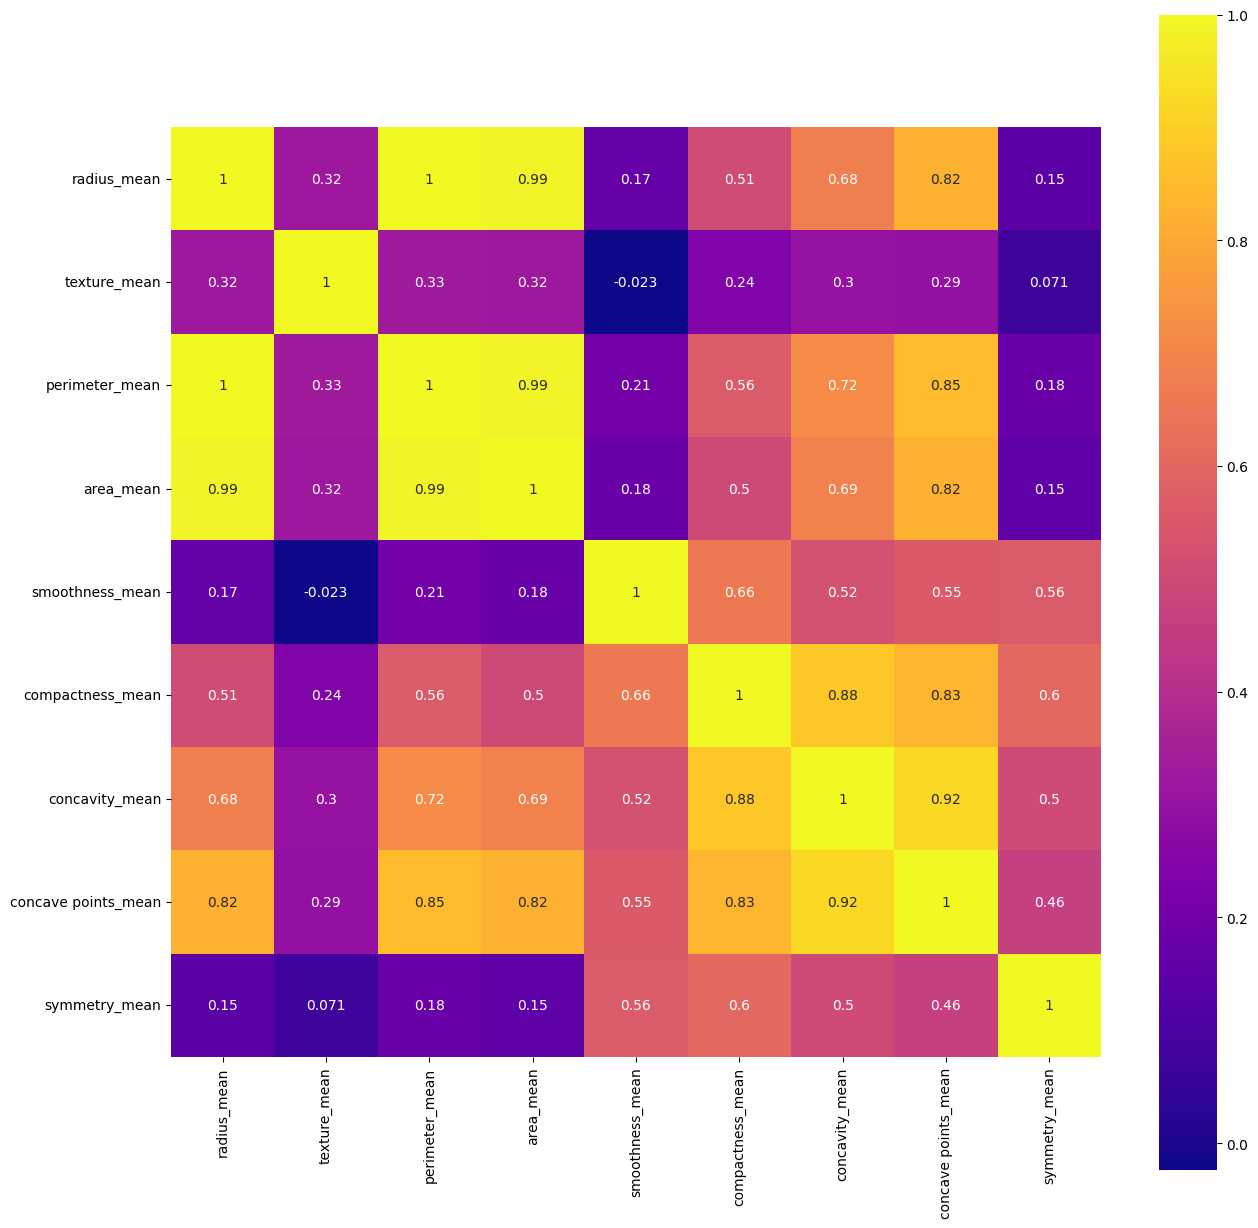

In [484]:
# identifing the correlation between columns from index 1 to 10
featureMeans = list(Dataset.columns[1:11])
plt.figure(figsize=(15,15))
sns.heatmap(Dataset[featureMeans].corr(), annot=True, square=True, cmap='plasma')
plt.show()

**Conclusion :**
1. plotting the correlation matrix, we can see that radius mean and perimeter mean is 100% correlated.

2. Also radius mean and area mean is also seen to 99% correlated.

3. Smoothness mean and texture mean is negatively correlated.


# Pre-Processing Steps

In [485]:
# Step 1: Removing the features which do not contribute to the model

columns_to_drop = ['id', 'Unnamed: 32']
Dataset = Dataset.drop(columns=columns_to_drop)


# Columns after removal
Dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [486]:
# Step 2 : Changing the Dtype of column 'diagnosis'
Dataset['diagnosis'] = Dataset['diagnosis'].map({'M':1,'B':0})


# After changing the dtype
Dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [487]:
# Step 3 (Pre processing ) : Standard scaling is done, to convert all the value in the same range
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Dataset.iloc[:, 1:])
Dataset.iloc[:, 1:] = scaled_data


# After scaling of the dataset
Dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [488]:
# Splitting the X and Y (target) varaibles
X = Dataset.iloc[:,1:]
Y= Dataset.iloc[:,[0]]

# Model building (Using Tensor flow Random Forest)


In [489]:
# Convert pandas DataFrames to numpy arrays
X_np = X.to_numpy()
Y_np = Y.to_numpy()

In [490]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, test_size=0.2, random_state=42)

In [491]:
# Model building
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=300)

Use /tmp/tmptfwj6kp8 as temporary training directory


In [492]:
# Model Training
model.fit(X_train, y_train)

Reading training dataset...
Training dataset read in 0:00:00.294992. Found 455 examples.
Training model...
Model trained in 0:00:00.119712
Compiling model...
Model compiled.


In [493]:
# Prediction
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [494]:
threshold = 0.5

# Convert predicted probabilities to binary class labels
predicted_labels_binary = (predicted_labels >= threshold).astype(int)

# Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(y_test, predicted_labels_binary)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 96.49%


# Model Evaluation

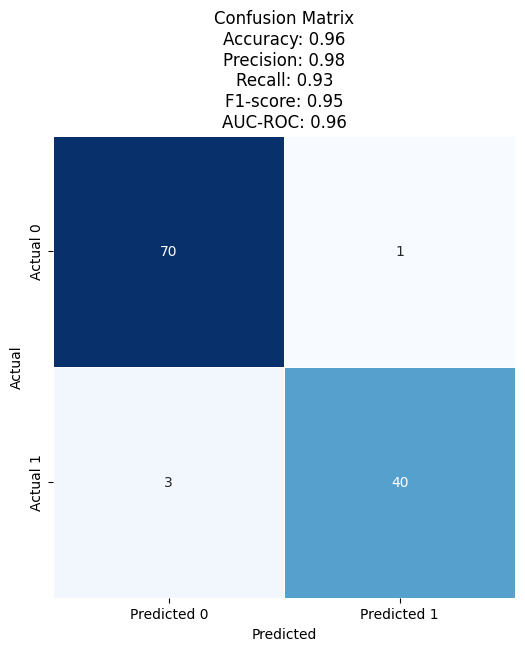

In [498]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels_binary)

# Calculate precision
precision = precision_score(y_test, predicted_labels_binary)

# Calculate recall
recall = recall_score(y_test, predicted_labels_binary)

# Calculate F1-score
f1 = f1_score(y_test, predicted_labels_binary)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, predicted_labels_binary)

# Create a heatmap for visualization with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True, cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nAccuracy: {:.2f}\nPrecision: {:.2f}\nRecall: {:.2f}\nF1-score: {:.2f}\nAUC-ROC: {:.2f}'.format(accuracy, precision, recall, f1, roc_auc))
plt.show()


In [499]:
# Calculate the classification report
report = classification_report(y_test, predicted_labels_binary, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97        71
     Class 1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**Conclusion :**
1. We can see that from the classification report and confusion matrix, that out of 43 malignant class in the test data, 3 were wrongly predicted, likewise out of 71 benign class 1 was wrongly predicted. by the model.

2. We can also see the accuracy score to be 96% with precision at 98% and recall at 93%


# Result

**It is seen that Random forest model can give a good amount of accuracy of around 96% although we can increase the accuracy by tuning the hyperparameters of the model such as the number of trees or max_depth of each decision tree, selecting the criterion or the method of balancing the imablanced dataset which can also stop the model from overfitting**